In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(
    style="whitegrid",   # options: white, dark, whitegrid, darkgrid, ticks
    palette="deep"       # color palettes: deep, muted, bright, dark, colorblind
)

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="numpy")  # suppress wsl warning

In [166]:
from cycler import cycler

plt.rcParams.update({

    # ==== FIGURE ====
    "figure.figsize": (6, 3),
    "figure.dpi": 120,
    "figure.facecolor": "white",
    "figure.titlesize": 16,          # match axes title
    "figure.titleweight": "bold",    # match axes title
    "figure.autolayout": True,

    # ==== FONT & TEXT ====
    "font.family": ["Roboto", "DejaVu Sans"],
    "text.color": "#2C2C2C",

    # ==== AXES ====
    "axes.facecolor": "#FAFAFA",
    "axes.titlesize": 16,
    "axes.titleweight": "bold",
    "axes.titlepad": 12,
    "axes.titlecolor": "#444444",
    "axes.labelsize": 14,
    "axes.labelcolor": "#2C2C2C",
    "axes.edgecolor": "#555555",
    "axes.linewidth": 0.8,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.grid": True,
    "axes.prop_cycle": cycler(color=[
        "#4E79A7", "#F28E2B", "#59A14F", "#E15759", "#B07AA1",
        "#9C755F", "#FF9DA7", "#8C8C8C", "#EDC948", "#76B7B2"
    ]),

    # ==== GRID ====
    "grid.alpha": 0.25,
    "grid.color": "#BBBBBB",
    "grid.linestyle": "--",

    # ==== TICKS ====
    "xtick.direction": "out",
    "ytick.direction": "out",
    "xtick.color": "#333333",
    "ytick.color": "#333333",
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,

    # ==== LEGEND ====
    "legend.fontsize": 12,
    "legend.frameon": True,
    "legend.framealpha": 0.85,
    "legend.facecolor": "white",
    "legend.edgecolor": "#DDDDDD",
    "legend.fancybox": True,
    "legend.shadow": False,

    # ==== LINES ====
    "lines.linewidth": 2.2,
    "lines.markersize": 6,
    "lines.markeredgewidth": 0.8
})

---

# Data

In [167]:
data = pd.read_csv('Titanic-Dataset.csv')
data = data.drop('PassengerId', axis=1)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [168]:
print(data.shape)

(891, 11)


In [169]:
for column_name, null_rows in data.isnull().sum(axis=0).items():
    if null_rows > 0:
        print(f'{column_name} | {null_rows}')

print('\n---\n')

print(f'Number of duplicated rows: {data.duplicated().sum(axis=0)}')

Age | 177
Cabin | 687
Embarked | 2

---

Number of duplicated rows: 0


---

# <center> Explorative Data analysis </center>

In [170]:
custom_palette = {'male': '#4E79A7', 'female': '#FF6B6B'}  # example: males red, females teal

## Sex

In [171]:
sex_df = (
    data['Sex']
    .value_counts(normalize=True)
    .reset_index(name='Percentage')
)
sex_df

,Sex,Percentage
0,male,0.647587
1,female,0.352413


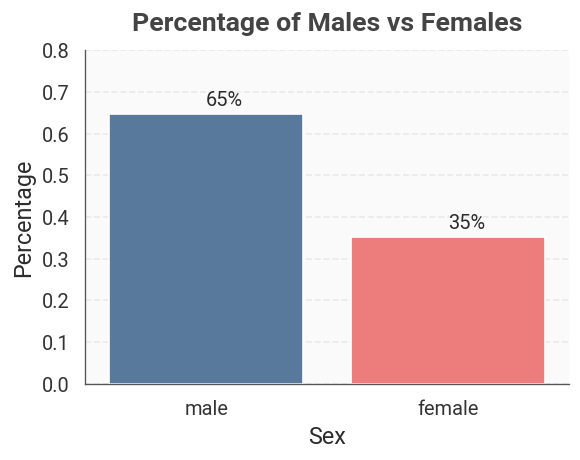

In [172]:
plt.figure(figsize=(5, 4))

ax = sns.barplot(data=sex_df, x='Sex', y='Percentage', hue='Sex', palette=custom_palette)

# for index, (sex, percentage) in enumerate(zip(sex_df.Sex, sex_df.Percentage)):
#     plt.text(index, percentage + 0.02, f'{percentage:.2f}%')

for bar, percentage in zip(ax.patches, sex_df.Percentage):
    ax.text(
       x =  bar.get_x() + bar.get_width() / 2.0,
       y =  bar.get_height() + 0.02,
       s =  f'{percentage * 100:.0f}%'
    )

plt.title('Percentage of Males vs Females')
plt.ylim(0.0, 0.8);

* The majority of passengers are men 65%
* Only 35% of the passengers are female

In [173]:

total_male_passengers = np.sum(data.Sex == 'male')
total_female_passengers = np.sum(data.Sex == 'female')

print(total_female_passengers)
survival_rate_by_sex = data.groupby(['Sex', 'Survived']).size()
survival_rate_by_sex = survival_rate_by_sex.reset_index(name='Count')


# add a column of percentages of each sex survival rate based on the total number of passengers of that specific sex
def get_divisor_by_sex(row):
    return total_male_passengers if row['Sex'] == 'male' else total_female_passengers

survival_rate_by_sex['Percentage'] = survival_rate_by_sex.apply(lambda row: np.round( row['Count'] / get_divisor_by_sex(row) * 100, 0), axis=1)

survival_rate_by_sex

314


,Sex,Survived,Count,Percentage
0,female,0,81,26.0
1,female,1,233,74.0
2,male,0,468,81.0
3,male,1,109,19.0


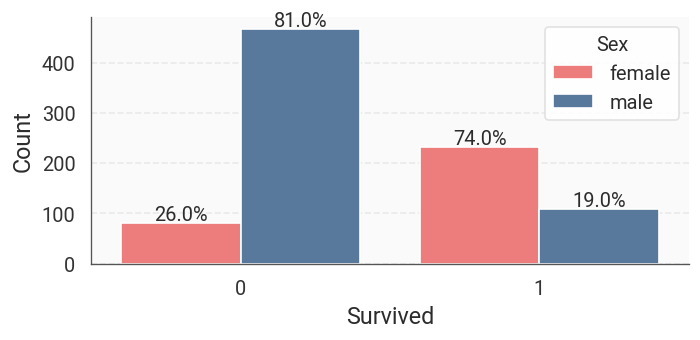

In [174]:
ax = sns.barplot(data=survival_rate_by_sex, x='Survived', y='Count', hue='Sex', palette=custom_palette)

for bar, percent in zip(ax.patches, survival_rate_by_sex['Percentage']):
    ax.text(
        bar.get_x() + bar.get_width() / 2.,
        bar.get_height() + 5,
        f'{percent}%',
        ha='center'
    )

* The majority of the deaths are men, 81%
* This is especially important since 65% of the passengers were men
* Even though women were only 35% of the passengers, 74% of women survived
* This is because women and children are prioritized during such events as a ship sinking.

---

## Class

In [175]:
total_passengers = data.shape[0]

# Count passengers per Pclass & Survived
class_survival = data.groupby(['Pclass', 'Survived']).size()

# Get total per class
total_per_class = class_survival.groupby(level=0).sum()

total_per_class = total_per_class.reset_index(name='Total')

total_per_class['Percentage'] = np.round(total_per_class['Total'] / total_passengers * 100, 2)
total_per_class

,Pclass,Total,Percentage
0,1,216,24.24
1,2,184,20.65
2,3,491,55.11


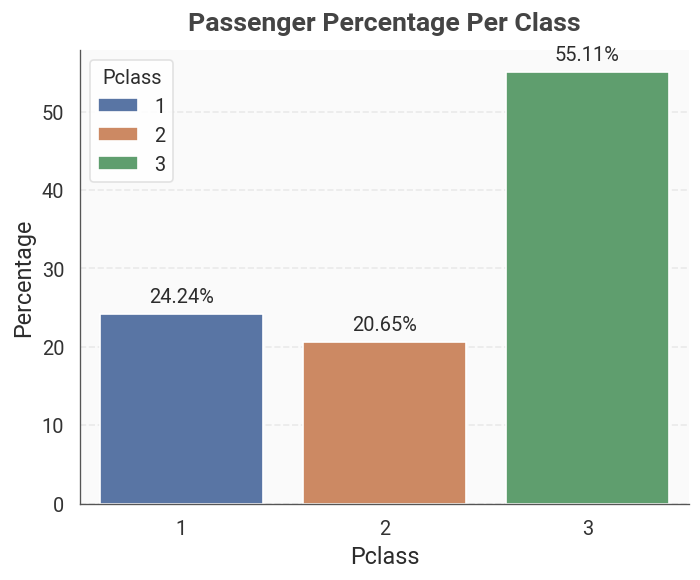

In [176]:
figure, ax = plt.subplots(1, 1, figsize=(6, 5))

sns.barplot(data=total_per_class, x='Pclass', y='Percentage', hue='Pclass', palette='deep', errorbar=None, ax=ax)

for bar, percentage in zip(ax.patches, total_per_class.Percentage):
    ax.text(
        x = bar.get_x() + bar.get_width() / 2.0,
        y = bar.get_height() + 1,
        s = f'{percentage:.2f}%',
        ha = 'center',
        va = 'bottom',
    )

ax.set_title('Passenger Percentage Per Class');

* The vast majority of passengers were in third class. So most passengers are low income.
* The rest of passengers are somewhat equally divided by the first and second class

In [177]:
# Count passengers per Pclass & Survived
class_survival = data.groupby(['Pclass', 'Survived']).size()

# Get total per class
total_per_class_2 = class_survival.groupby(level=0).sum()

# Calculate percentage survival/died within each class
percentages = (class_survival / total_per_class_2) * 100

# Convert to DataFrame for merging with plot
class_survival_df = class_survival.reset_index(name='Count')
class_survival_df['Survival_Percentage'] = percentages.values
class_survival_df

,Pclass,Survived,Count,Survival_Percentage
0,1,0,80,37.037037
1,1,1,136,62.962963
2,2,0,97,52.717391
3,2,1,87,47.282609
4,3,0,372,75.763747
5,3,1,119,24.236253


Text(0.5, 1.0, 'Survival Rate by Passenger Class')

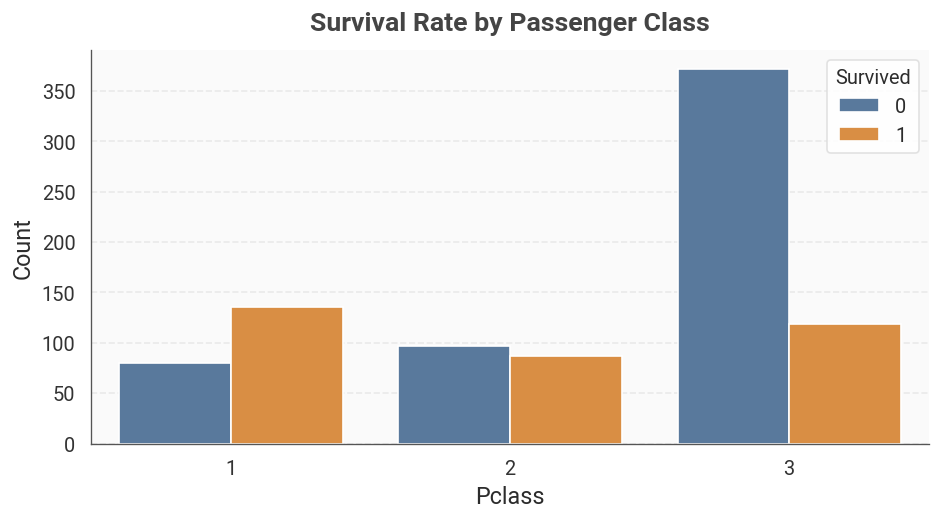

In [178]:
figure, ax = plt.subplots(1, 1, figsize=(8, 4.5))

sns.barplot(data=class_survival_df, x='Pclass', y='Count', hue='Survived', ax=ax)

ax.set_title('Survival Rate by Passenger Class')

* Majority of passengers from third class died 76%. Only 24% survived.
* Second class passengers survival is about equal. 53% survived, 47% did not.
* First class is the only class where a passenger had a higher chance of survival.
  * A passenger from first class had a 63% of surviving the titanic.
  * Only 37% of first class passengers died
  * This indicates that lifeboats might have prioritized for first class passengers.

---

## Parch (Passengers with parents or children)

In [179]:
parch_value_counts = data.Parch.value_counts().reset_index(name='Total')
parch_value_counts['Percentage'] = np.round(parch_value_counts['Total'] / total_passengers * 100, 2)
print(parch_value_counts, '\n')

print('-' * 40, '\n')

parch_survival = data.groupby(['Parch', 'Survived', 'Sex']).size().reset_index(name='Total')
print(parch_survival.head(8), '\n')

   Parch  Total  Percentage
0      0    678       76.09
1      1    118       13.24
2      2     80        8.98
3      5      5        0.56
4      3      5        0.56
5      4      4        0.45
6      6      1        0.11 

---------------------------------------- 

   Parch  Survived     Sex  Total
0      0         0  female     41
1      0         0    male    404
2      0         1  female    153
3      0         1    male     80
4      1         0  female     14
5      1         0    male     39
6      1         1  female     46
7      1         1    male     19 



In [180]:
passengers_without_parents_children = parch_survival.loc[parch_survival.Parch == 0].copy()
passengers_without_parents_children['Percentage'] = np.round( passengers_without_parents_children.Total / passengers_without_parents_children.Total.sum() * 100, 1)
passengers_without_parents_children

,Parch,Survived,Sex,Total,Percentage
0,0,0,female,41,6.0
1,0,0,male,404,59.6
2,0,1,female,153,22.6
3,0,1,male,80,11.8


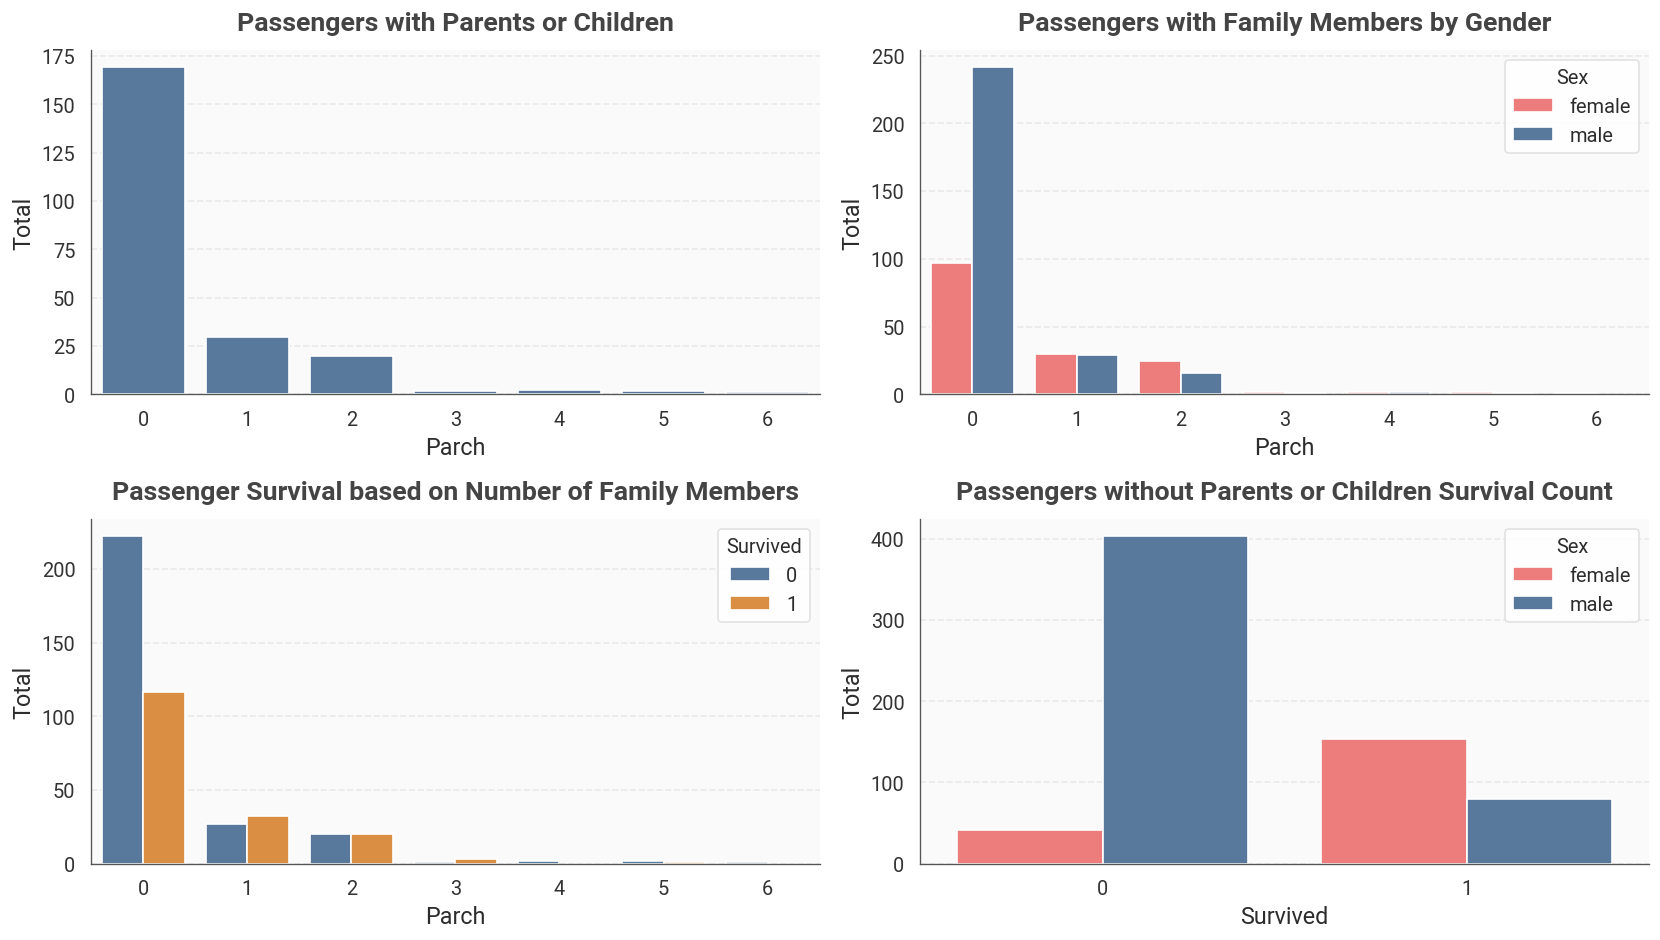

In [181]:
figure, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()

sns.barplot(data=parch_survival, x='Parch', y='Total', ax=axes[0], errorbar=None)
axes[0].set_title('Passengers with Parents or Children')


sns.barplot(data=parch_survival, x='Parch', y='Total', hue='Sex', ax=axes[1], palette=custom_palette, errorbar=None)
axes[1].set_title('Passengers with Family Members by Gender')

sns.barplot(data=parch_survival, x='Parch', y='Total', hue='Survived', ax=axes[2], errorbar=None)
axes[2].set_title('Passenger Survival based on Number of Family Members')

sns.barplot(data=passengers_without_parents_children, x='Survived', y='Total', hue='Sex', palette=custom_palette, ax=axes[3])
axes[3].set_title('Passengers without Parents or Children Survival Count');

* The most interesting segment of passengers in terms of number of parents and children, is the one without any parents or children accompanying them.
    * Most of the passengers were not accompanied by parents or children.
    * Most of the passengers that were not accompanied by parents or children were male.
    * Most these passengers did not survive.
    * most of them that did not survive, were men 60%.

## SibSp

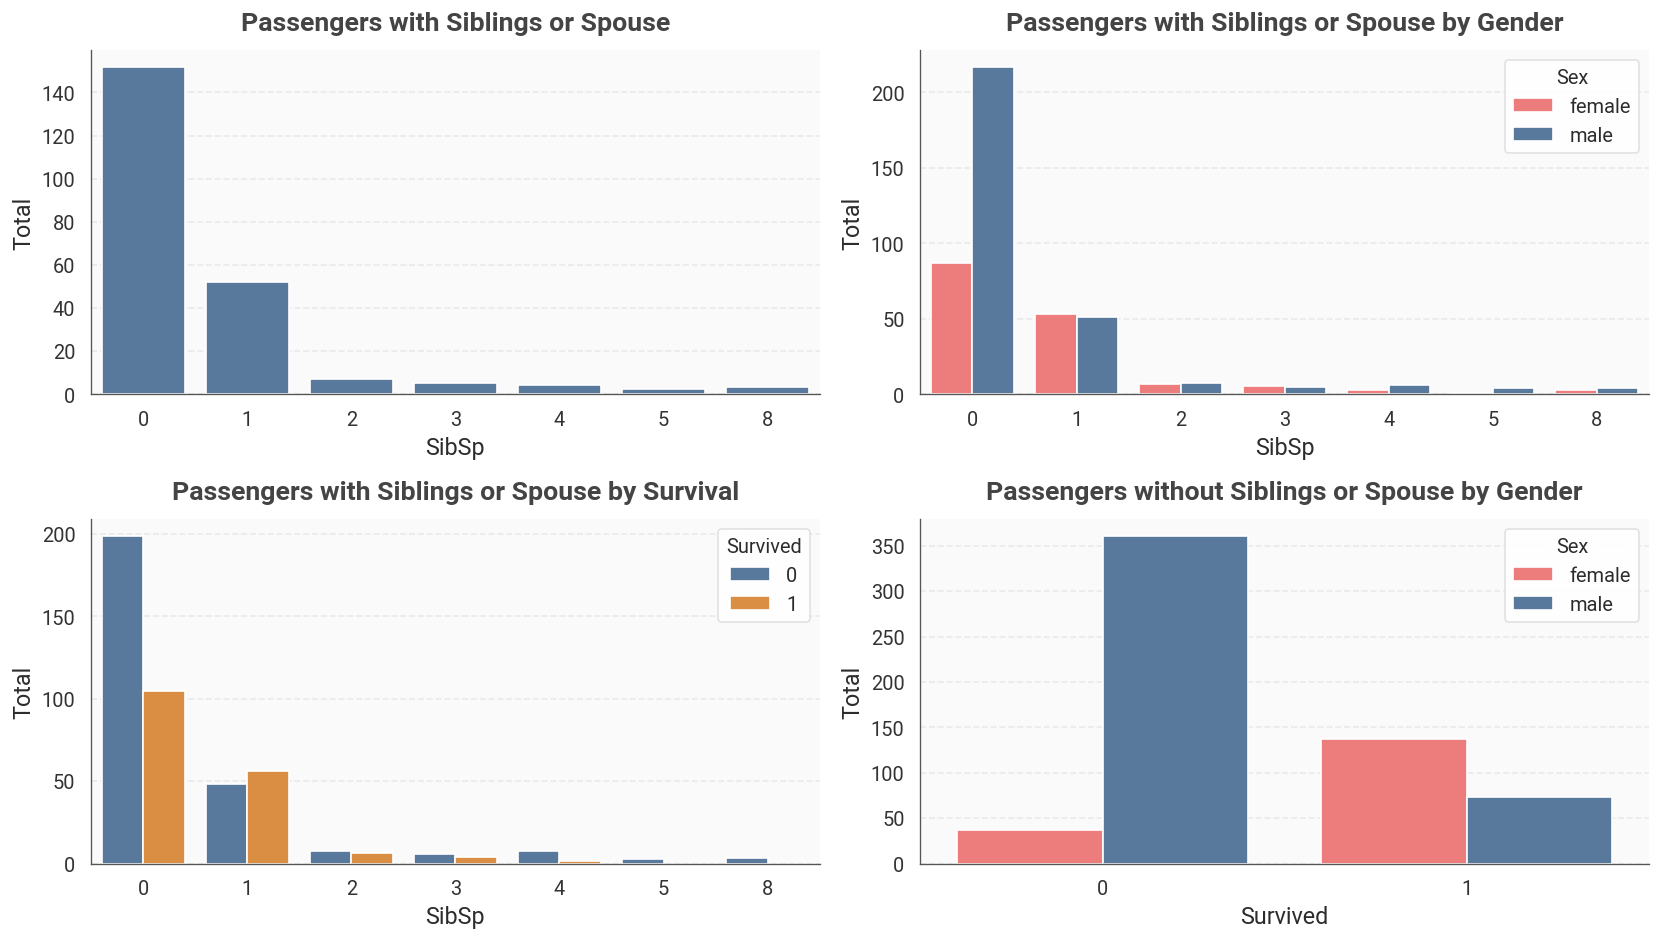

In [182]:
siblings_spouse =  data.groupby(['SibSp', 'Sex', 'Survived']).size().reset_index(name='Total')
# print(siblings_spouse)

figure, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()

sns.barplot(data=siblings_spouse, x='SibSp', y='Total', errorbar=None, ax=axes[0])
axes[0].set_title('Passengers with Siblings or Spouse')

sns.barplot(data=siblings_spouse, x='SibSp', y='Total', hue='Sex', errorbar=None, palette=custom_palette, ax=axes[1])
axes[1].set_title('Passengers with Siblings or Spouse by Gender')

sns.barplot(data=siblings_spouse, x='SibSp', y='Total', hue='Survived', errorbar=None, ax=axes[2])
axes[2].set_title('Passengers with Siblings or Spouse by Survival')

single_without_siblings_passengers = siblings_spouse.loc[siblings_spouse['SibSp'] == 0]

sns.barplot(data=single_without_siblings_passengers, x='Survived', y='Total', hue='Sex', errorbar=None, palette=custom_palette, ax=axes[3])
axes[3].set_title('Passengers without Siblings or Spouse by Gender');

---

# <center> Feature Engineer: Parch + SibSp </center>

## Single Male Passengers

In [183]:
data['SingleMale'] = ((data.Parch == 0) &
                          (data.SibSp == 0) &
                          (data.Sex == 'male')).astype(int)

# Not useful as there are no single females aboard the ship
# data['SingleFemale'] = ((data.Parch == 0) &
#                             (data.SibSp == 0) &
#                             (data.Sex) == 'female').astype(int)

single_male_total = data.groupby(['SingleMale', 'Survived']).size().reset_index(name='Total')
single_male_total['Percentage'] = np.round(single_male_total['Total'] / total_passengers * 100, 0)
single_male_total

,SingleMale,Survived,Total,Percentage
0,0,0,202,23.0
1,0,1,278,31.0
2,1,0,347,39.0
3,1,1,64,7.0


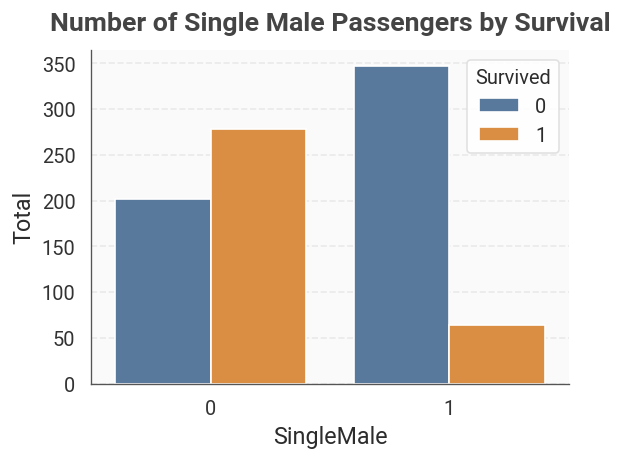

In [184]:
plt.figure(figsize=(5, 4))
sns.barplot(data=single_male_total, x='SingleMale', y='Total', hue='Survived', errorbar=None, )
plt.title('Number of Single Male Passengers by Survival');

## Family Size

    FamilySize  Survived  Total
0            0         0    374
1            0         1    163
2            1         0     72
3            1         1     89
4            2         0     43
5            2         1     59
6            3         0      8
7            3         1     21
8            4         0     12
9            4         1      3
10           5         0     19
11           5         1      3
12           6         0      8
13           6         1      4
14           7         0      6
15          10         0      7


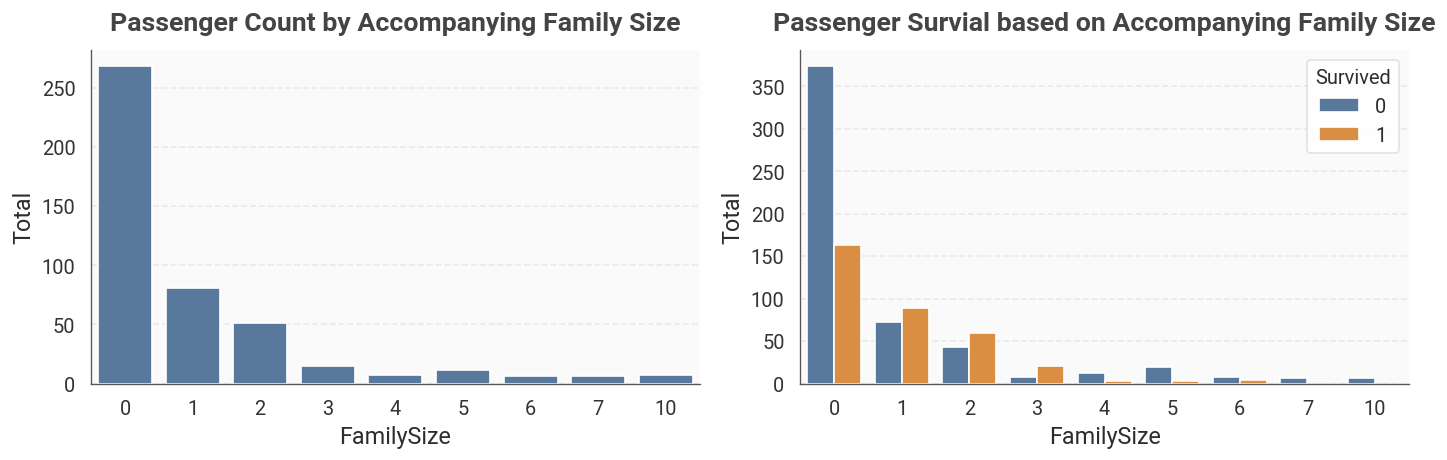

In [185]:
data['FamilySize'] = data.Parch + data.SibSp

survival_by_family_size = data.groupby(['FamilySize', 'Survived']).size().reset_index(name='Total')
print(survival_by_family_size)

figure, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.barplot(data=survival_by_family_size, x='FamilySize', y='Total', errorbar=None, ax=axes[0])
axes[0].set_title('Passenger Count by Accompanying Family Size')

sns.barplot(data=survival_by_family_size, x='FamilySize', y='Total', hue='Survived', errorbar=None, ax=axes[1])
axes[1].set_title('Passenger Survial based on Accompanying Family Size')


figure.tight_layout()

In [186]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SingleMale,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0


---

# <center> Preprocessing </center>

In [187]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


preprocessor = ColumnTransformer(
    transformers=[
        # Transform the Sex feature into 1 if male, 0 if female
        ('encoder1', OneHotEncoder(drop='if_binary', sparse_output=False), ['Sex']),  # drop param doesn't create two columns since Sex is binary
        
        # Transform the Embarked feature into three columns:
            # 1. C column
            # 2. Q column
            # 3. S column
        ('encoder2', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # fill the null values with the most frequent value
            ('encoder', OneHotEncoder(sparse_output=False)),       # transform it into the 3 columns 
        ]), ['Embarked']),
        
        # fill the missing values of the Age feature with the media value of the Age feature 
        ('imputer', SimpleImputer(strategy='median'), ['Age']),

        # Standard scaling on the Fare feature
        ('scaler', StandardScaler(), ['Fare']),
    ],
    remainder='passthrough',
)

In [188]:
features = data.drop(['Survived', 'Name', 'Cabin', 'Ticket'], axis=1)
target   = data['Survived']

In [189]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, shuffle=True, random_state=42, stratify=target)

---

# <centeR> Model Comparison </center>

In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC

pipe_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

pipe_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_estimators=100, min_samples_leaf=15, min_samples_split=20))
])

pipe_svc = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearSVC())
])

pipe_grad_boost = Pipeline([
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier(learning_rate=0.05, min_samples_leaf=15, min_samples_split=10))
])

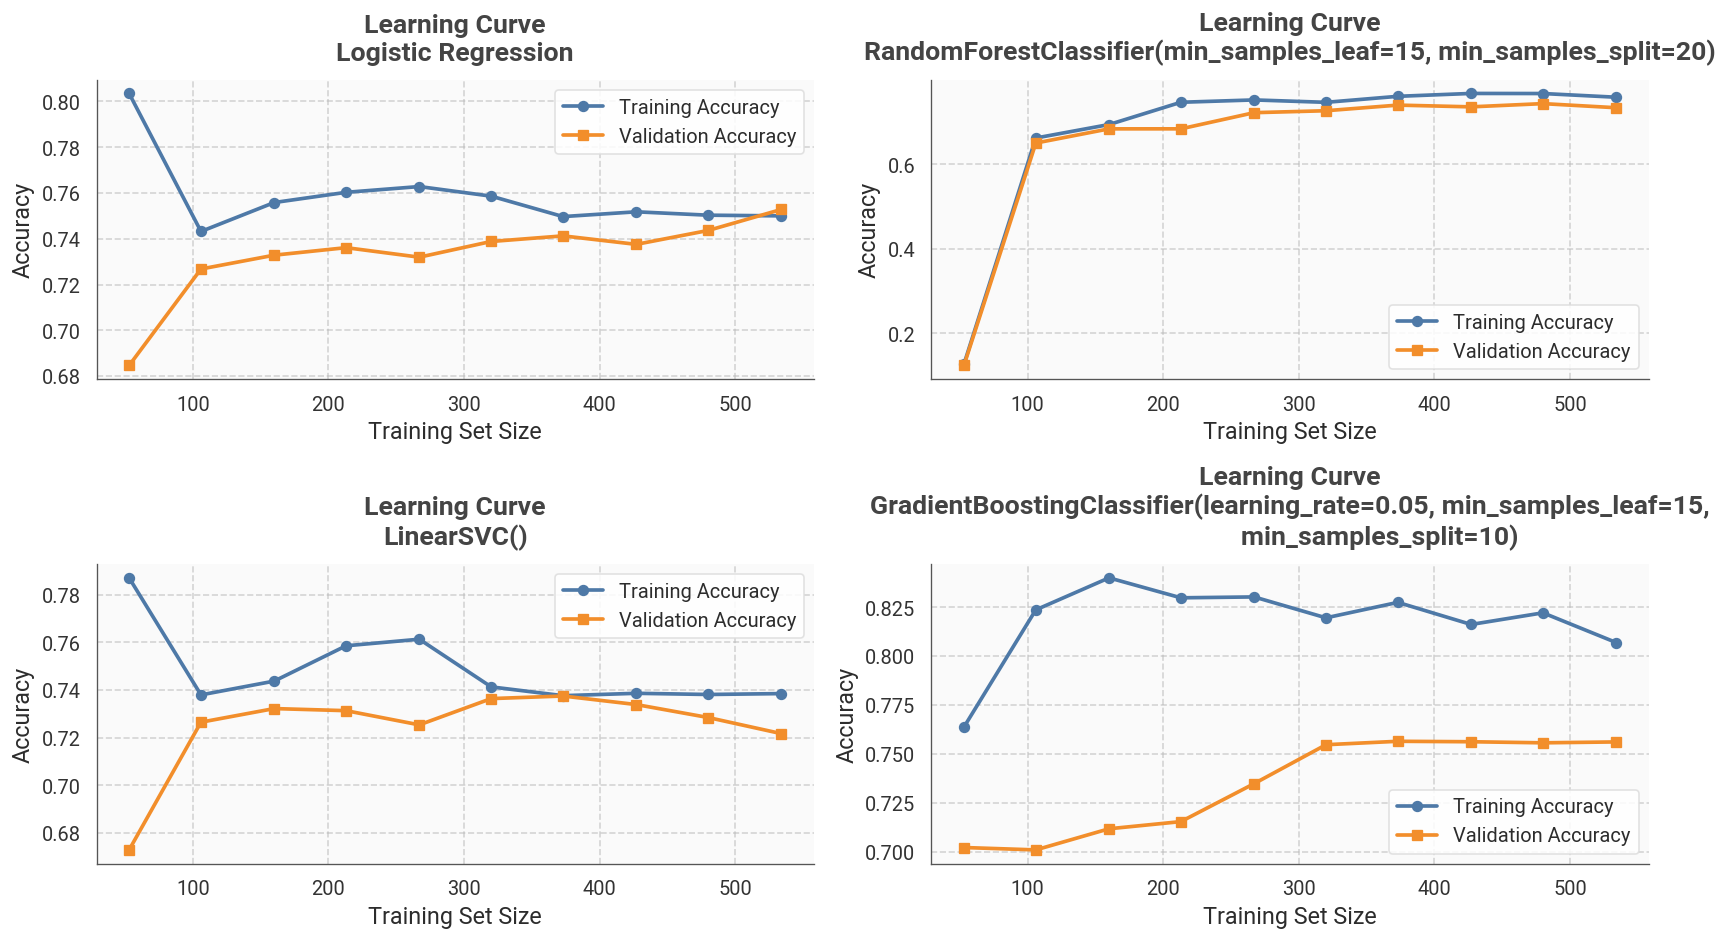

In [191]:
import sys
sys.path.append('../../')
from my_utils.learnin_curve import plot_learning_curve

figure, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()

training_means, validation_means = plot_learning_curve(pipe_lr, X_train, y_train, cv=5,
                                                       scoring='f1', ax=axes[0], label='Accuracy', model_name='Logistic Regression')


# print('\n[Logistic Regression]\n')
# print(f'Training Means:\n{training_means}', '\n')
# print(f'Validation Means:\n{validation_means}')

training_means, validation_means = plot_learning_curve(pipe_rf, X_train, y_train, cv=5,
                                                       scoring='f1', ax=axes[1], label='Accuracy', model_name=f'{str(pipe_rf['model'])}')

# print('\n[Random Forest]\n')
# print(f'Training Means :\n{training_means}', '\n')
# print(f'Validation Means:\n{validation_means}')


training_means, validation_means = plot_learning_curve(pipe_svc, X_train, y_train, cv=5,
                                                       scoring='f1', ax=axes[2], label='Accuracy', model_name=f'{str(pipe_svc['model'])}')

# print('\n[Support Vector Classifier]\n')
# print(f'Training Means :\n{training_means}', '\n')
# print(f'Validation Means:\n{validation_means}')


training_means, validation_means = plot_learning_curve(pipe_grad_boost, X_train, y_train, cv=5,
                                                       scoring='f1', ax=axes[3], label='Accuracy', model_name=f'{pipe_grad_boost['model'].__str__()}')

# print('\n[Gradient Boosting Classifier]\n')
# print(f'Training Means :\n{training_means}', '\n')
# print(f'Validation Means:\n{validation_means}')

####  Logistic Regression model seems to be the best model
* Random forest is the closest one to Logistic Regression.
* However, since Logistic Regression is the simpler model with better interpratability, I will always choose Logistic Regression in this case.

In [192]:
pipe_lr.fit(X_train, y_train)
lr_predictions = pipe_lr.predict(X_test)

pipe_rf.fit(X_train, y_train)
rf_predictions = pipe_lr.predict(X_test)

pipe_svc.fit(X_train, y_train)
svc_predictions = pipe_lr.predict(X_test)

pipe_grad_boost.fit(X_train, y_train)
grad_boost_predictions = pipe_lr.predict(X_test)

* Now that the pipe is fitted on the data, I just want to see how it transformed the features

In [193]:
X_train_transformed = pipe_lr['preprocessor'].transform(X_train)
X_train_transformed = pd.DataFrame(X_train_transformed, columns=pipe_lr['preprocessor'].get_feature_names_out()).head()
X_train_transformed

,encoder1__Sex_male,encoder2__Embarked_C,encoder2__Embarked_Q,encoder2__Embarked_S,imputer__Age,scaler__Fare,remainder__Pclass,remainder__SibSp,remainder__Parch,remainder__SingleMale,remainder__FamilySize
0,0.0,0.0,0.0,1.0,35.0,1.240397,1.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,19.0,-0.436028,2.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,34.0,-0.383310,2.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,4.0,-0.192999,3.0,0.0,2.0,0.0,2.0
4,0.0,0.0,0.0,1.0,21.0,-0.436028,2.0,0.0,0.0,0.0,0.0


In [194]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

metrics = {
    'Accuracy': accuracy_score,
    'Recall': recall_score,
    'Precision': precision_score,
    'F1': f1_score
}

predictions = {
    'Logistic Regression': lr_predictions,
    'Random Forest': rf_predictions,
    'SVC': svc_predictions,
    'Gradient Boosting': grad_boost_predictions
}

results = {}

for model_name, predictions in predictions.items():
    results[model_name] = {metric_name: func(y_test, predictions) for metric_name, func in metrics.items()}

pd.DataFrame( results ).round(2).T

,Accuracy,Recall,Precision,F1
Logistic Regression,0.77,0.79,0.67,0.72
Random Forest,0.77,0.79,0.67,0.72
SVC,0.77,0.79,0.67,0.72
Gradient Boosting,0.77,0.79,0.67,0.72


# Logistic Regression Stability

In [195]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

n_folds = 5
skfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

accuracies = cross_val_score(pipe_lr, X_train, y_train, cv=skfold, scoring='accuracy')
recalls    = cross_val_score(pipe_lr, X_train, y_train, cv=skfold, scoring='recall')
precisions = cross_val_score(pipe_lr, X_train, y_train, cv=skfold, scoring='precision')
f1s        = cross_val_score(pipe_lr, X_train, y_train, cv=skfold, scoring='f1')

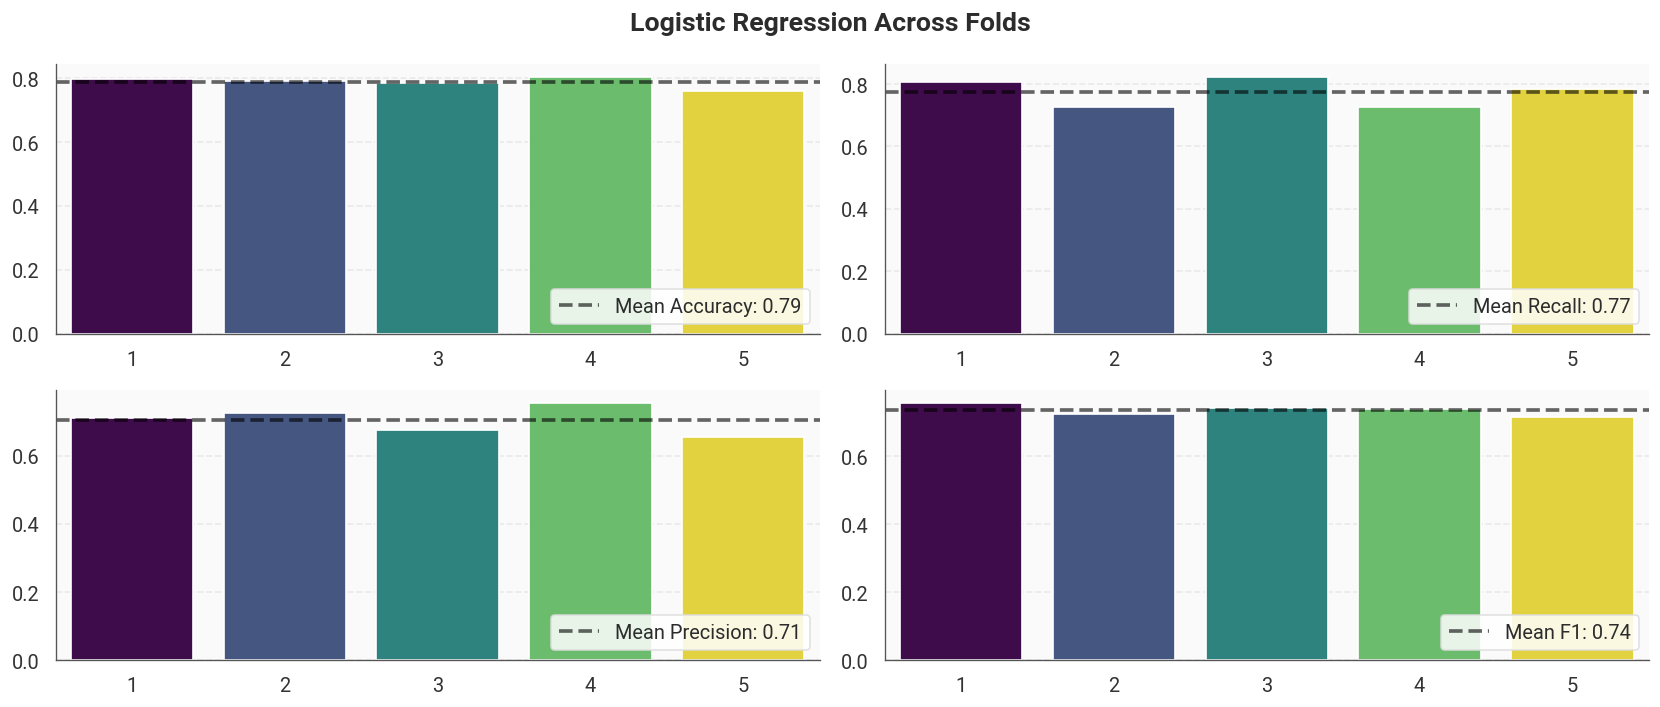

In [196]:
folds = np.arange(1, n_folds + 1)


figure, axes = plt.subplots(2, 2, figsize=(14, 6))
axes = axes.flatten()


for ax, (score_name, score_values) in zip(axes, zip(['Accuracy', 'Recall', 'Precision', 'F1'], [accuracies, recalls, precisions, f1s]) ):
    sns.barplot(x=folds, y=score_values, ax=ax, hue=folds, palette='viridis', legend=False)
    ax.axhline(y=np.mean(score_values), linestyle='--', color='black', alpha=0.6, label=f'Mean {score_name}: {np.mean(score_values):.2f}')
    ax.legend(loc='lower right')

figure.suptitle('Logistic Regression Across Folds')
figure.tight_layout()

#### Logistic Regression is quite stable across 5 folds

In [197]:
logistic_regression = pipe_lr['model']
coeffs = logistic_regression.coef_.round(2)
intercept = logistic_regression.intercept_

feature_names: list[str] = preprocessor.get_feature_names_out()

feature_names = [name.split('__')[1] for name in feature_names]

coeffs_df = pd.DataFrame(data={'feature': feature_names, 'coefficient': coeffs[0]})
coeffs_df['log_odds'] = np.exp(coeffs_df['coefficient'])
coeffs_df['survival_percentage_change_in_odds'] = ( np.exp(coeffs_df.coefficient) - 1 ) * 100
# coeffs_df['survival_probability'] = (1 / (1 + np.exp(-coeffs_df.coefficient)))
coeffs_df = coeffs_df.sort_values(by='coefficient', ascending=False)
coeffs_df.reset_index(drop=True, inplace=True)

coeffs_df

,feature,coefficient,log_odds,survival_percentage_change_in_odds
0,Embarked_Q,0.21,1.233678,23.367806
1,Fare,0.13,1.138828,13.882838
2,Embarked_C,0.06,1.061837,6.183655
3,Parch,0.06,1.061837,6.183655
4,Age,-0.04,0.960789,-3.921056
5,FamilySize,-0.18,0.835270,-16.472979
6,SibSp,-0.24,0.786628,-21.337214
7,Embarked_S,-0.27,0.763379,-23.662051
8,SingleMale,-0.94,0.390628,-60.937216
9,Pclass,-1.00,0.367879,-63.212056


[[103  34]
 [ 18  68]]
              precision    recall  f1-score   support

           0       0.85      0.75      0.80       137
           1       0.67      0.79      0.72        86

    accuracy                           0.77       223
   macro avg       0.76      0.77      0.76       223
weighted avg       0.78      0.77      0.77       223



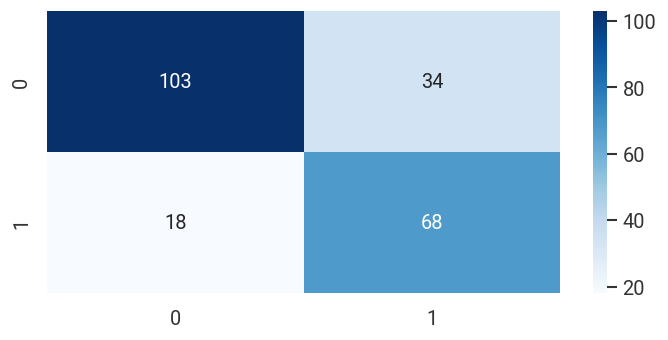

In [205]:
from sklearn.metrics import confusion_matrix, classification_report

pipe_lr.fit(X_train, y_train)
lr_predictions = pipe_lr.predict(X_test)

conf_mat = confusion_matrix(y_test, lr_predictions)
print(conf_mat)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
print(classification_report(y_test, lr_predictions))